### import libraries

In [776]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

In [777]:
df=pd.read_csv(r'D:\course\Courses\NTI final project\NTI-final-project-\data\row\water_potability.csv')
df

ph    Hardness  ...  Turbidity  Potability
0          NaN  204.890455  ...   2.963135           0
1     3.716080  129.422921  ...   4.500656           0
2     8.099124  224.236259  ...   3.055934           0
3     8.316766  214.373394  ...   4.628771           0
4     9.092223  181.101509  ...   4.075075           0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821           1
3272  7.808856  193.553212  ...   2.798243           1
3273  9.419510  175.762646  ...   3.298875           1
3274  5.126763  230.603758  ...   4.708658           1
3275  7.874671  195.102299  ...   2.309149           1

[3276 rows x 10 columns]

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [778]:
print(df.shape)

(3276, 10)

In [779]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [780]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')


In [781]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [782]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

In [783]:
import plotly.express as px


In [784]:
d = df['Potability'].value_counts().reset_index(name='Count')

fig = px.pie(d,values='Count',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=['#04669B','#5AA8D2'],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color='#000000',size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

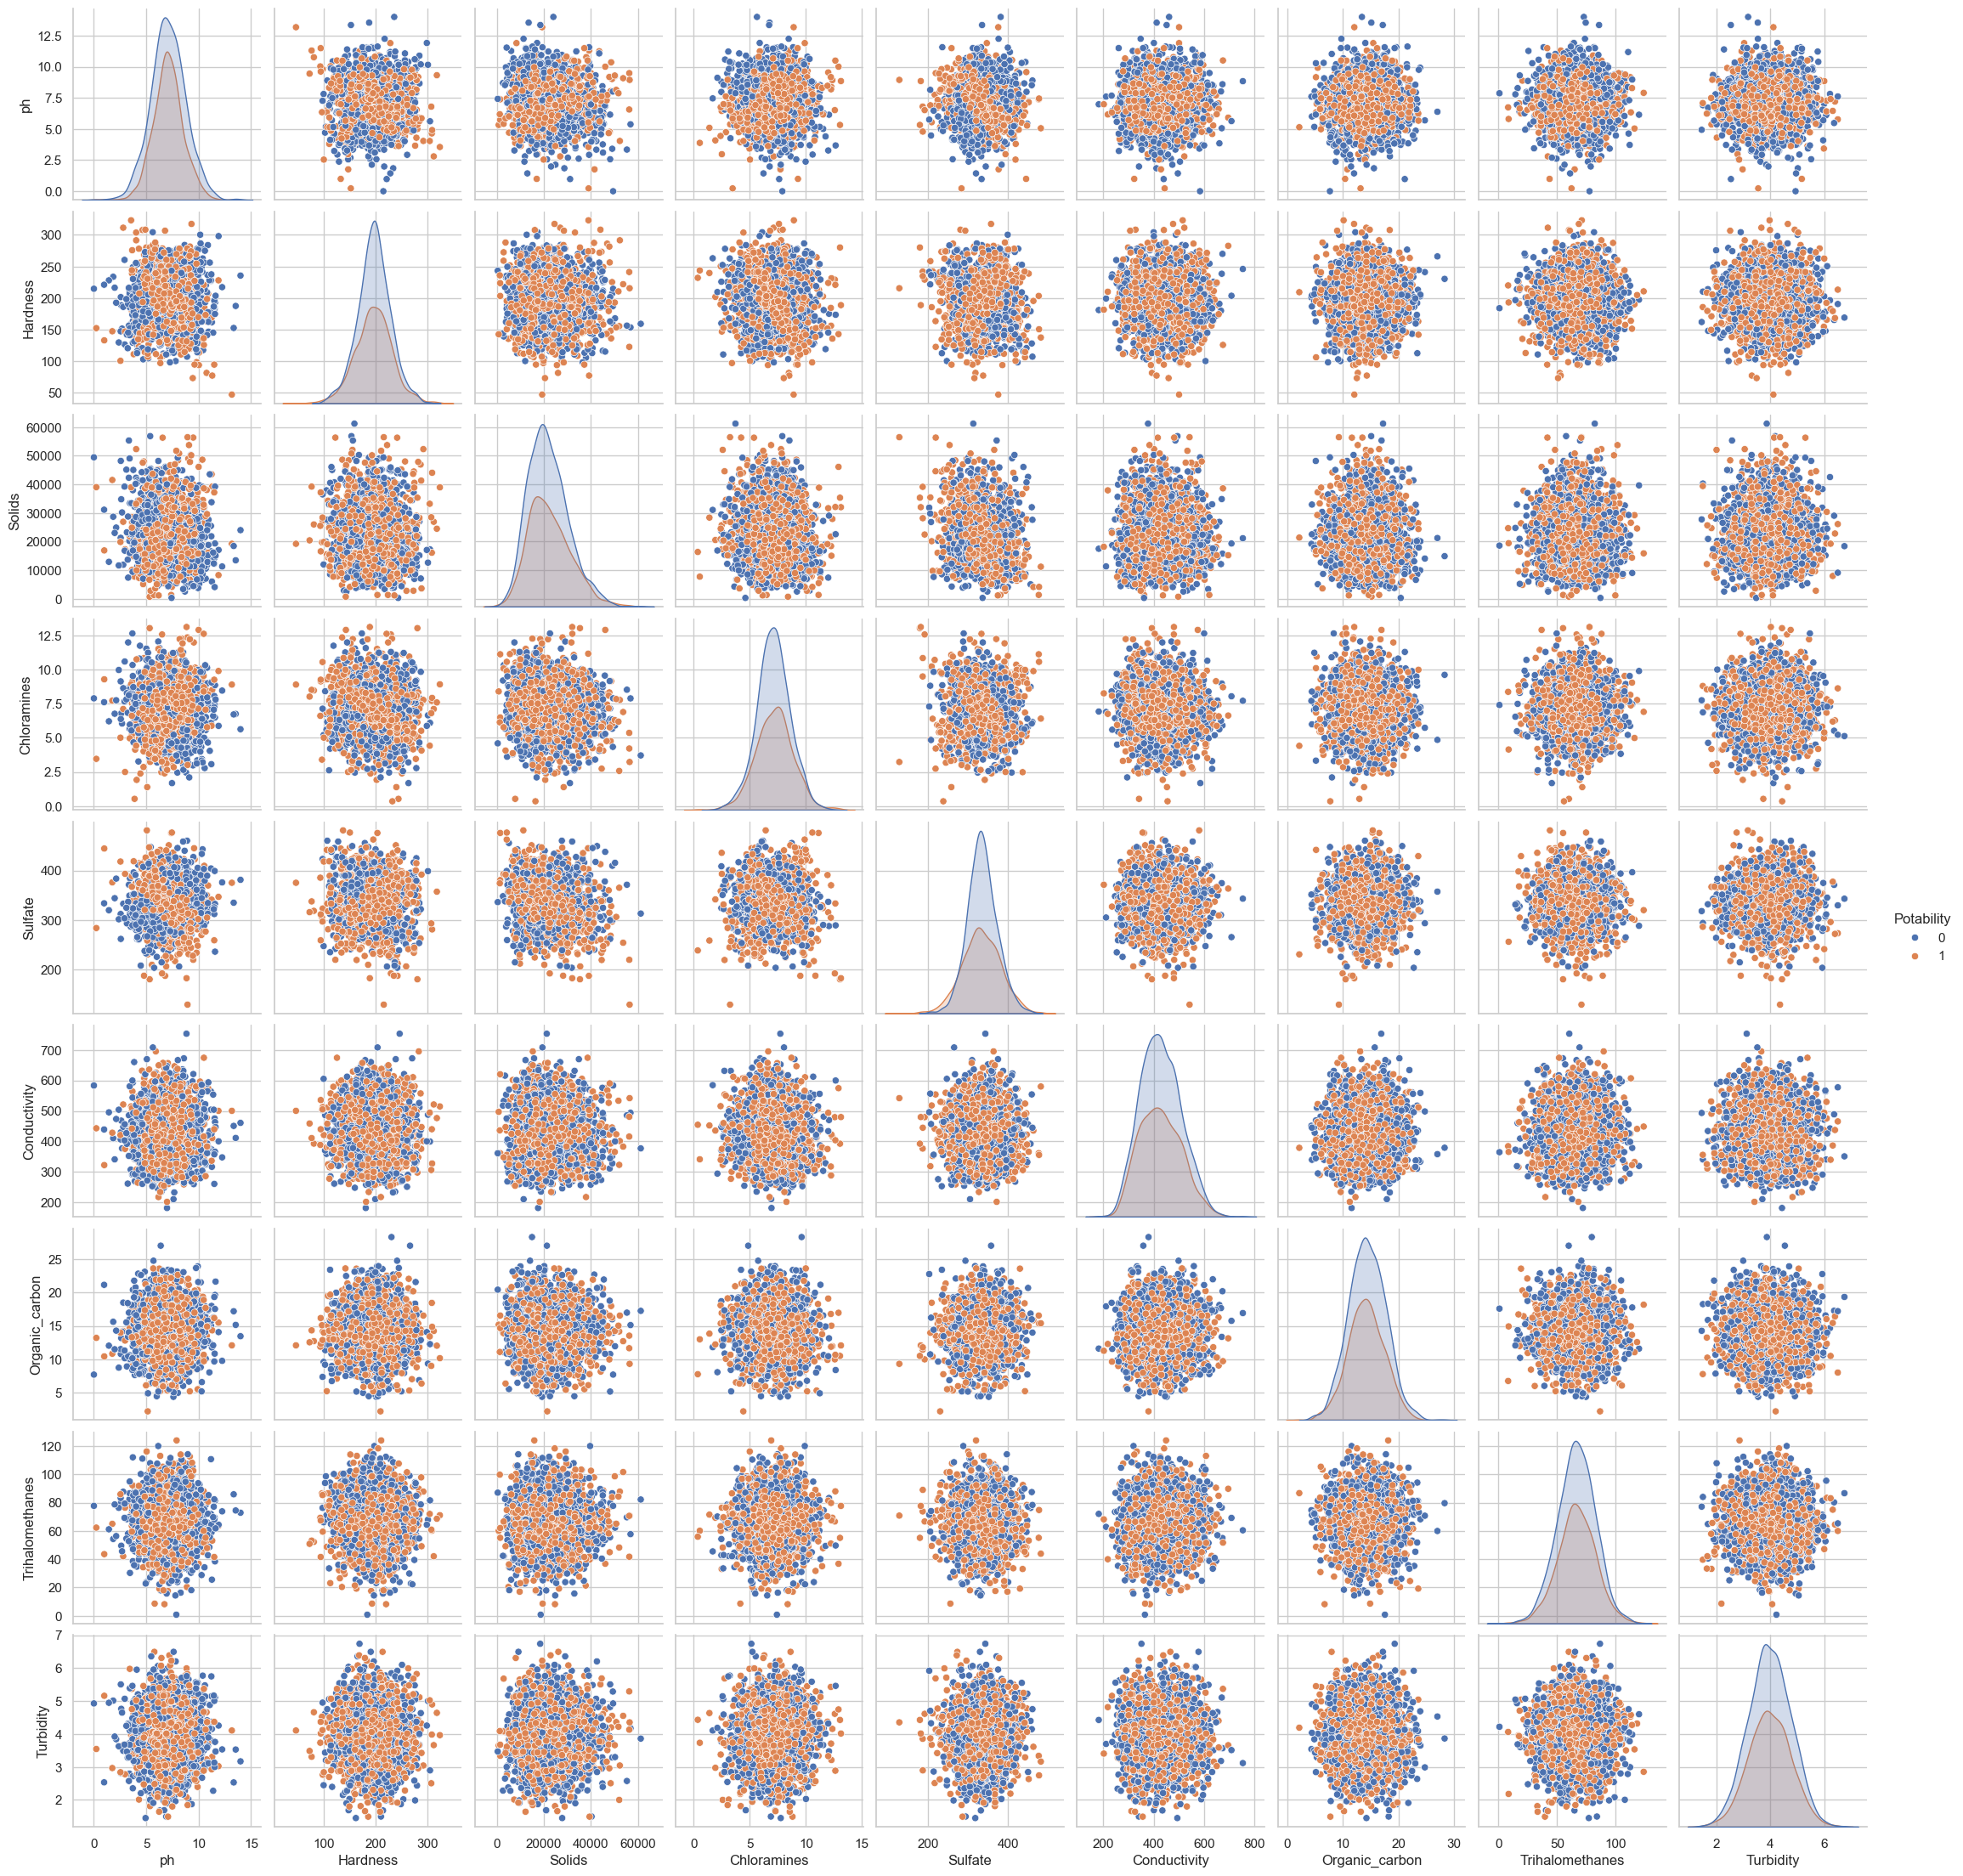

In [785]:
sns.pairplot(df,hue='Potability')

## data cleaning

In [786]:
df.duplicated().sum()

np.int64(0)

## check  missing values

In [787]:
def missing_value1(df):
    
 missing_value=df.isnull().sum().sort_values(ascending=False)

 missing_value=missing_value[missing_value>0]
 missing_value=missing_value/len(df)
 print( missing_value)
 print(f"number of missing value is {len(missing_value)}")
    

In [788]:
missing_value1(df)

Sulfate            0.238400
ph                 0.149878
Trihalomethanes    0.049451
dtype: float64

number of missing value is 3

<Axes: title={'center': 'missing values per columns'}>

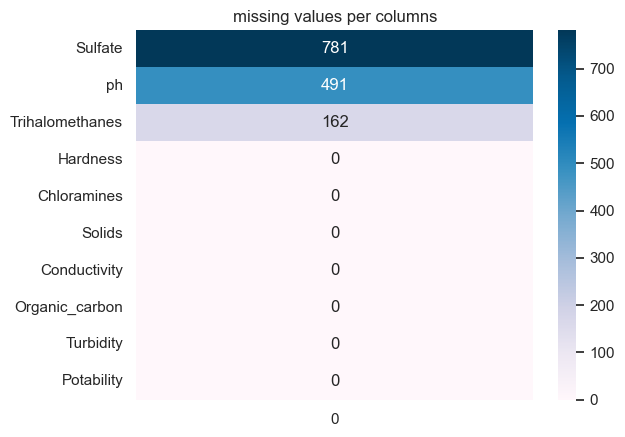

In [789]:
plt.title("missing values per columns")
missing_value=df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(missing_value,cmap='PuBu',fmt='d',annot=True)

<Axes: >

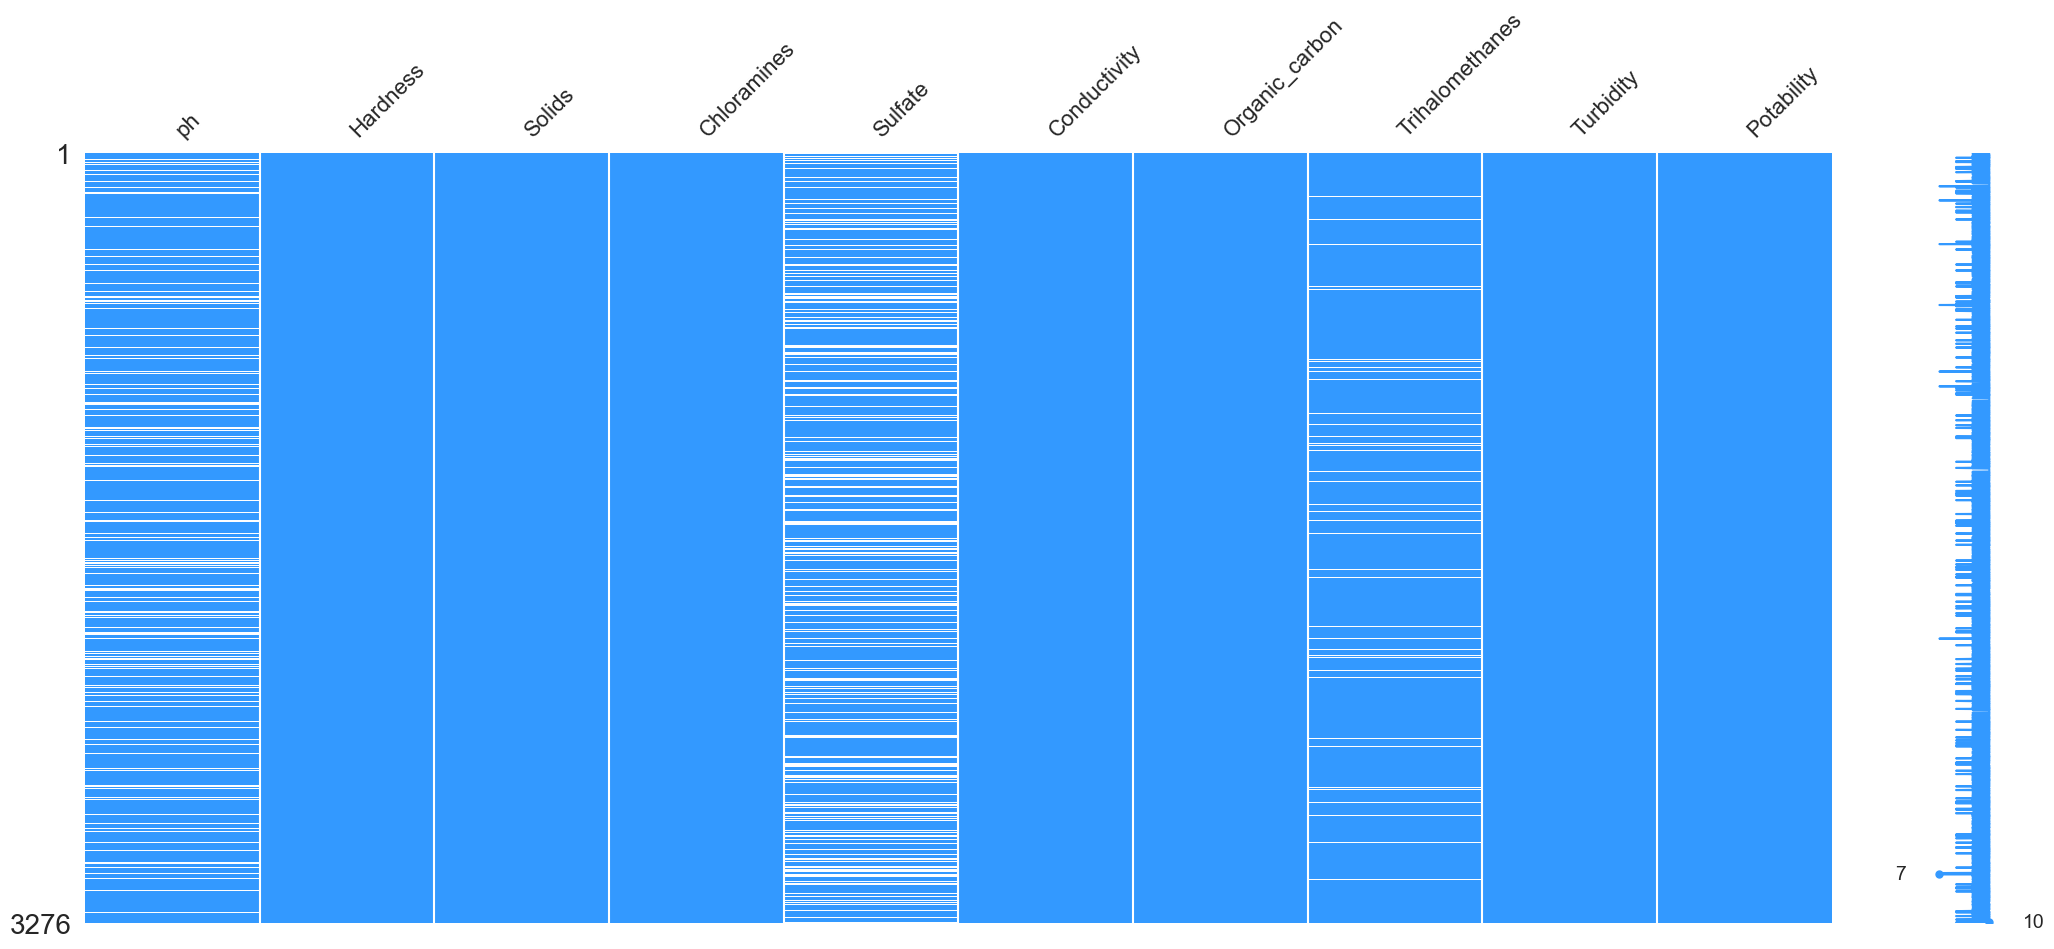

In [790]:
import missingno as mso
mso.matrix(df,color=(0.2, 0.6, 1))

### handle misisng values with median 

Text(0, 0.5, 'Frequency')

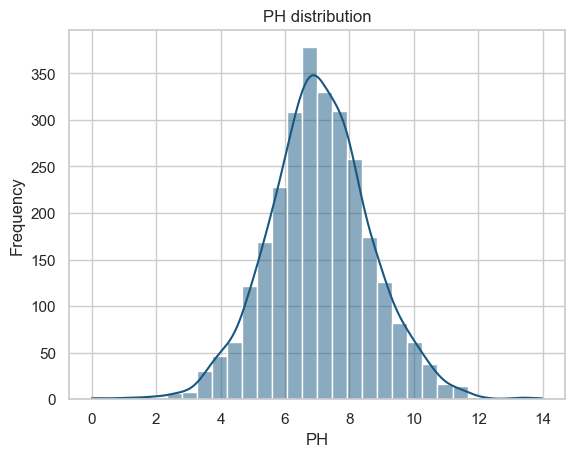

In [791]:
sns.set(style='whitegrid')
sns.histplot(df['ph'], bins=30, kde=True, color="#175780")
plt.title("PH distribution")
plt.xlabel("PH")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

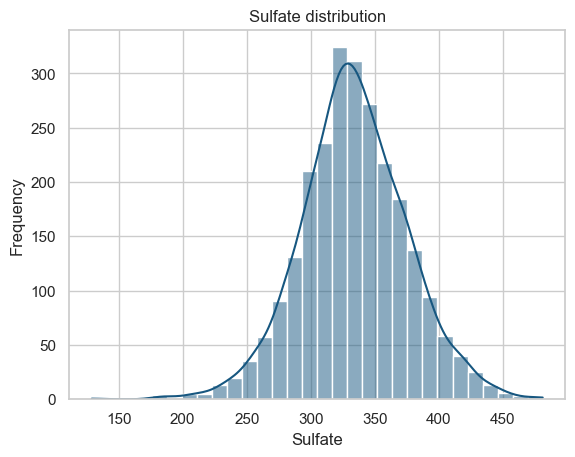

In [792]:
sns.set(style='whitegrid')
sns.histplot(df['Sulfate'], bins=30, kde=True, color="#175780")
plt.title("Sulfate distribution")
plt.xlabel("Sulfate")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

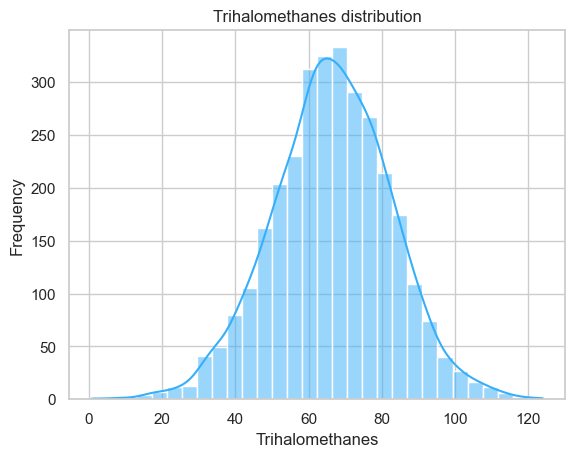

In [793]:
sns.set(style='whitegrid')
sns.histplot(df['Trihalomethanes'], bins=30, kde=True, color="#36AFFA")
plt.title("Trihalomethanes distribution")
plt.xlabel("Trihalomethanes")
plt.ylabel("Frequency")

## handle missing values 

In [794]:
missing_value1(df)

Sulfate            0.238400
ph                 0.149878
Trihalomethanes    0.049451
dtype: float64

number of missing value is 3

In [795]:
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\2646235595.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [796]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\216950065.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\216950065.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [797]:
missing_value1(df)

Series([], dtype: float64)

number of missing value is 0

## detect outlier

In [798]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\984152713.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\984152713.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\984152713.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\984152713.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

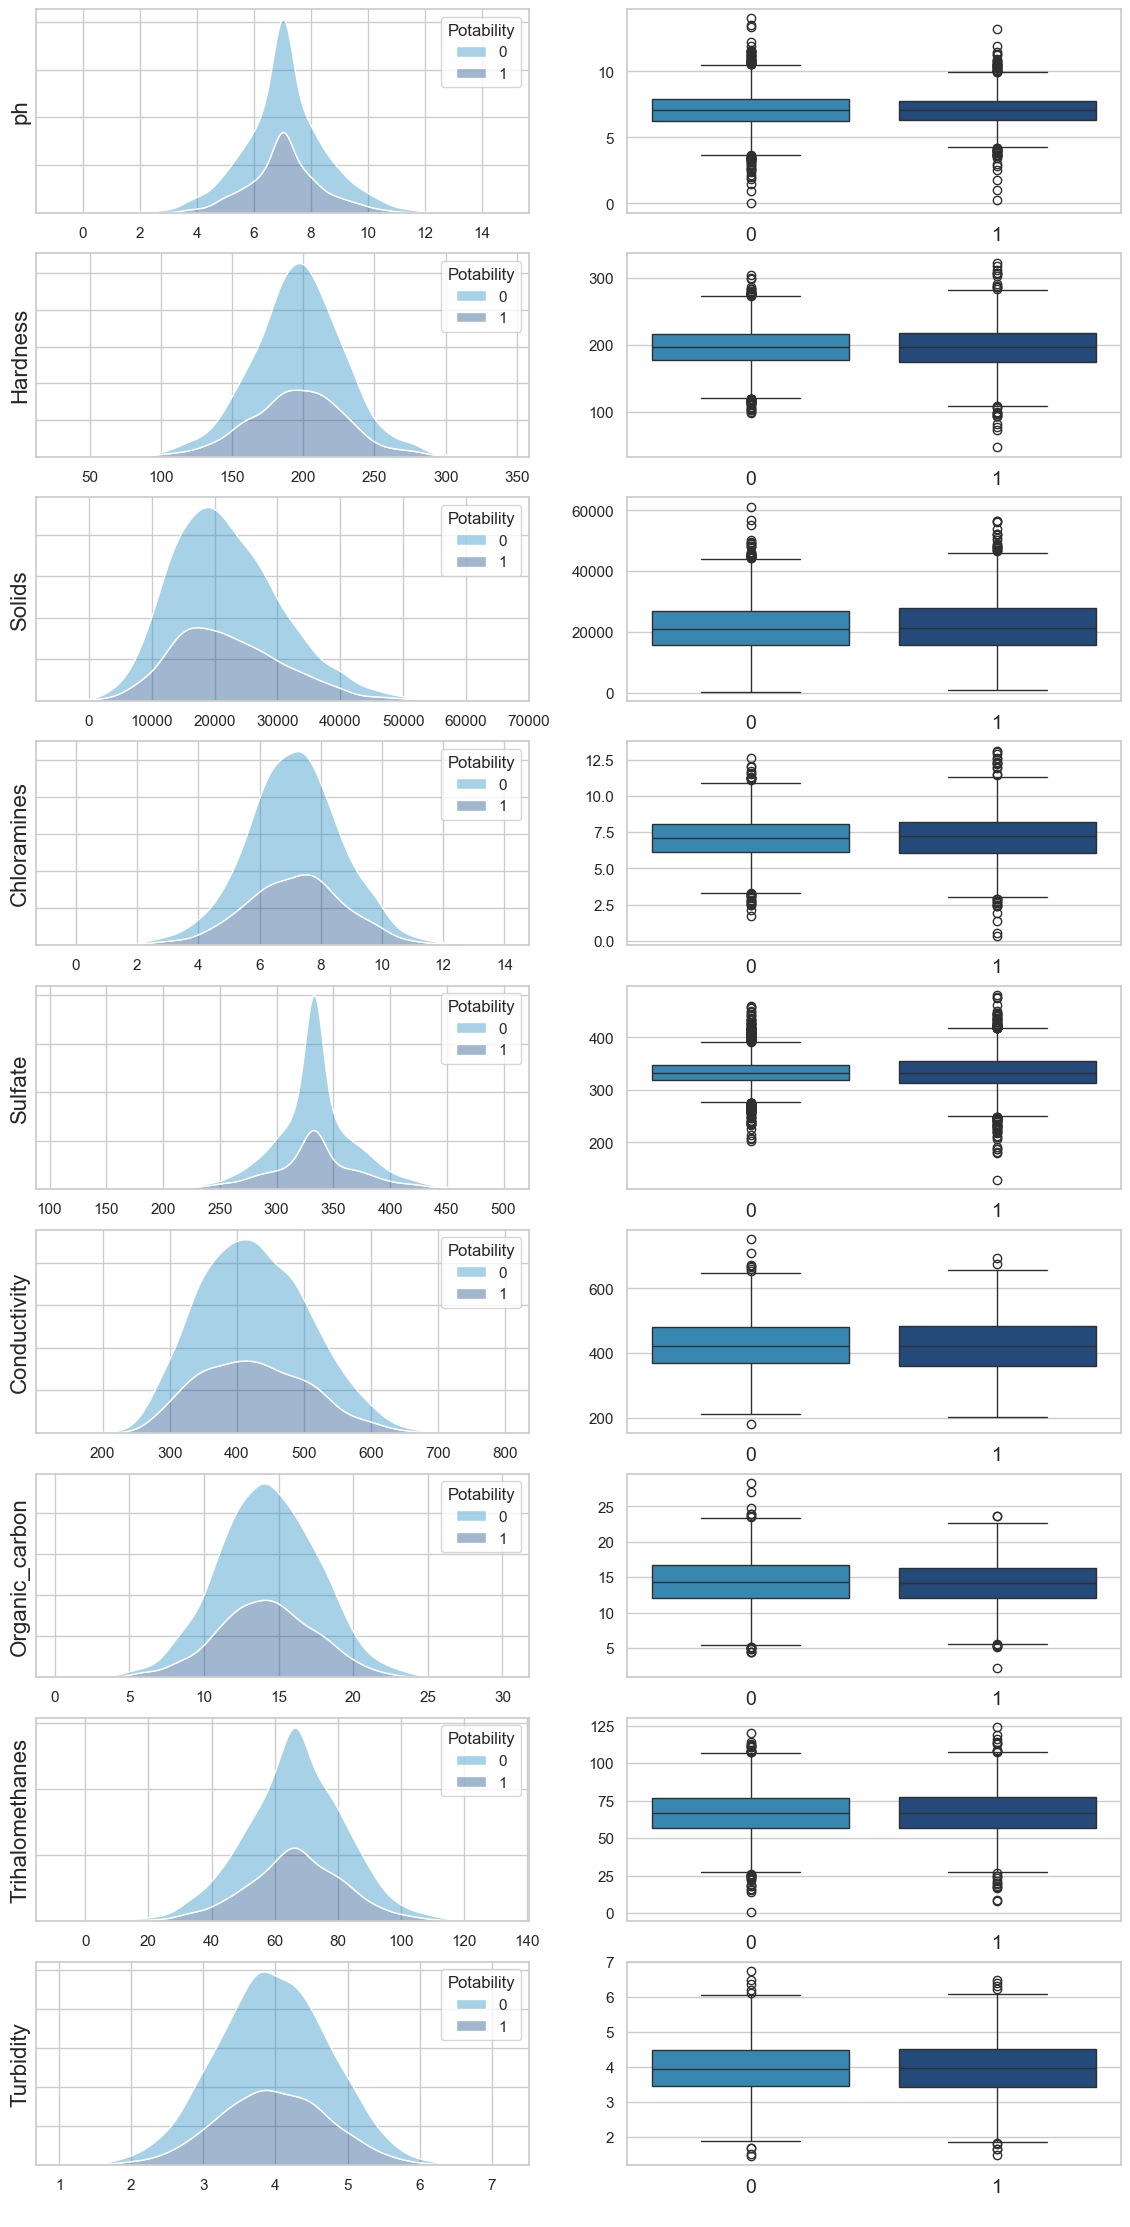

In [799]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))

features =['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
i=0
for cols in features:
    sns.kdeplot(x=df[cols], fill=True, alpha=0.4, hue =df.Potability, 
                palette=('#248DC5', "#154989"), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df, y=cols, x='Potability', ax=ax[i, 1],
               palette=('#248DC5', '#154989'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1
      
plt.show()

In [800]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [801]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
lower=q1-IQR*1.5
upper=q3+1.5*IQR
for x in df.columns:
    df[x]=np.where(df[x]>upper[x],upper[x],df[x])
    df[x]=np.where(df[x]<lower[x],lower[x],df[x])

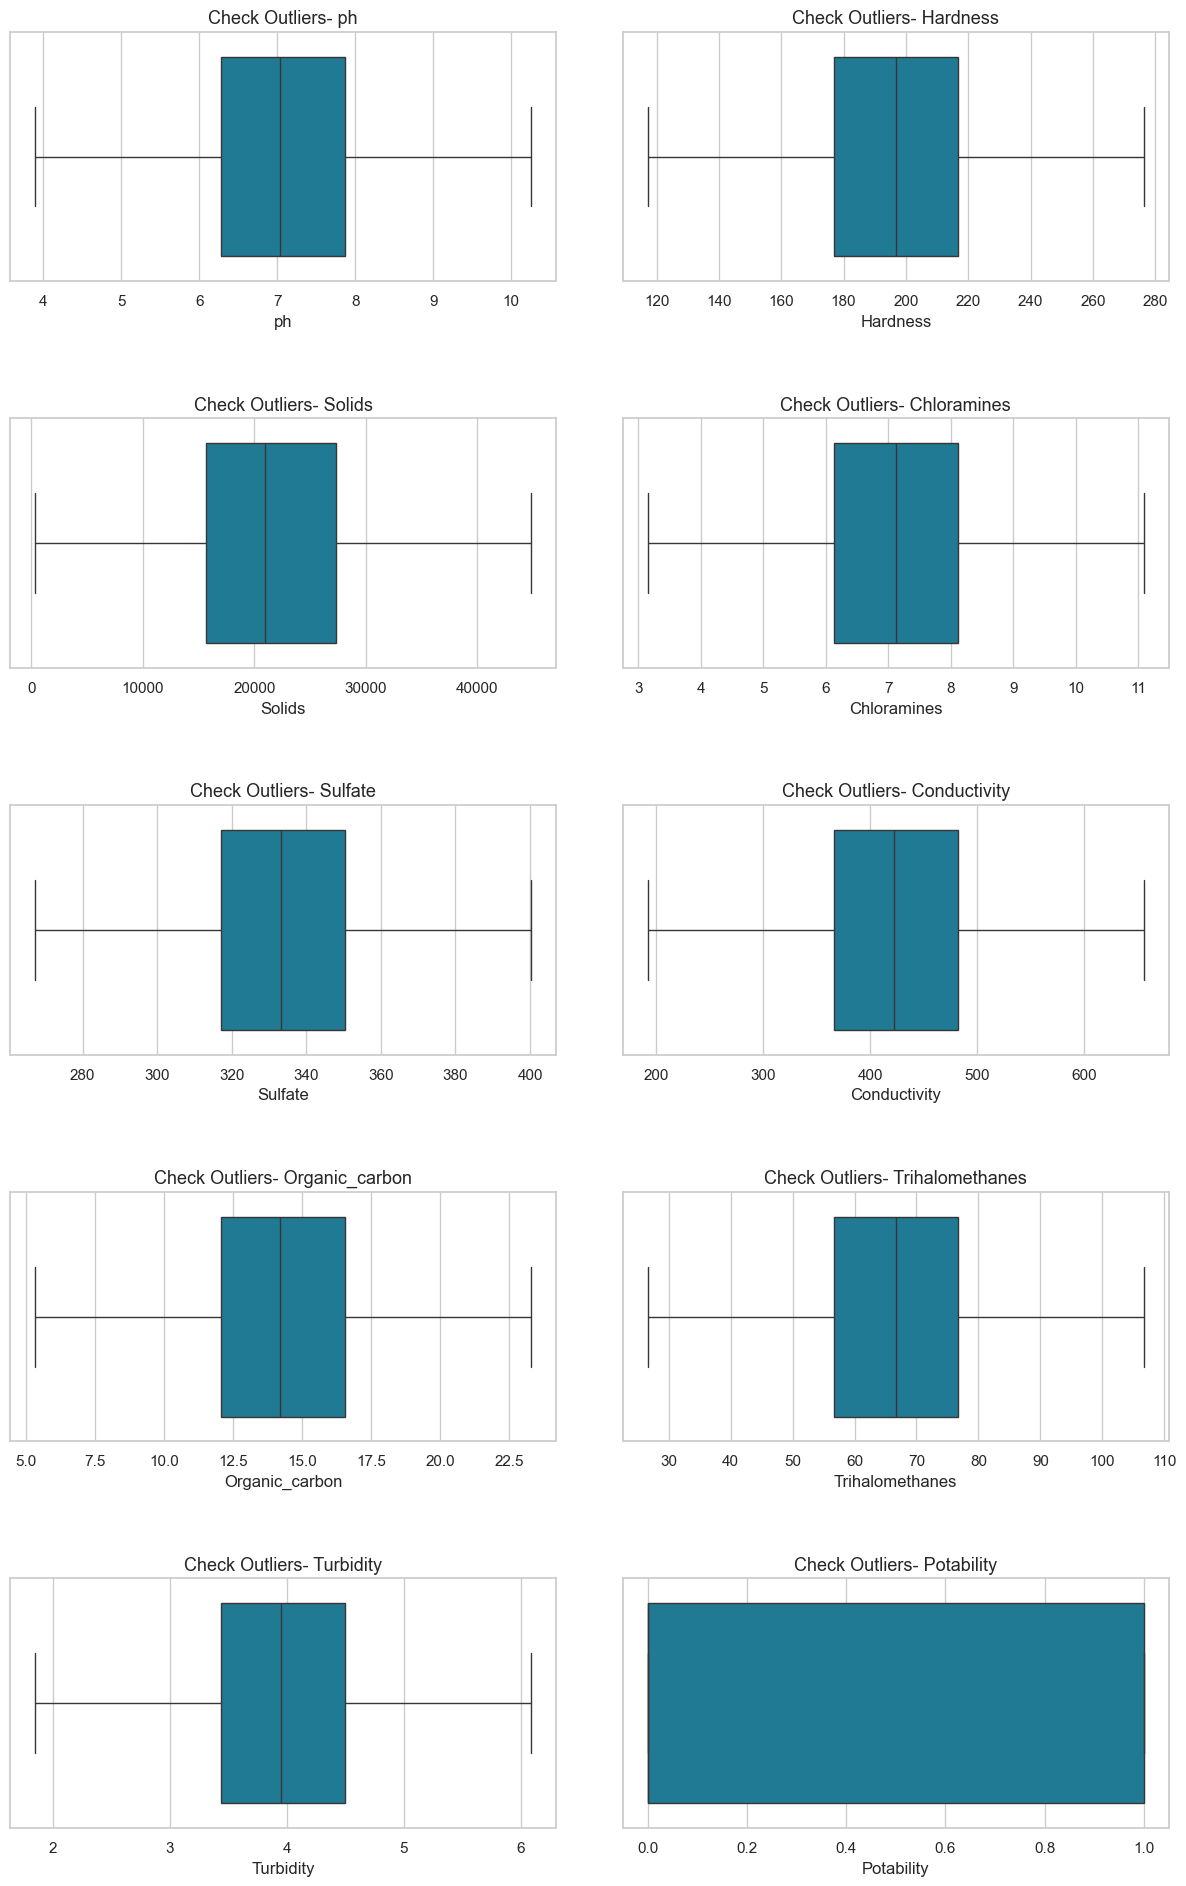

In [802]:
plt.figure(figsize=(13,20))
for k, cols in enumerate(df):
    plt.subplot(5,2, k+1)
    sns.boxplot(x=cols,data=df, color="#0E85A6")
    plt.title(f"Check Outliers- {cols}", fontsize=13)
    plt.tight_layout(pad=4.0)
    
plt.show()

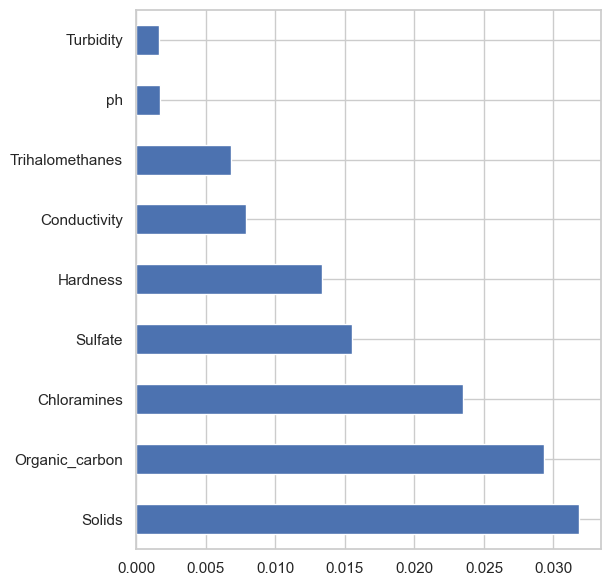

In [803]:
target = "Potability"                                # <‑‑ change if needed
corr_to_target = (df.corr(numeric_only=True)[target]
                  .drop(target)                     # remove self‑correlation
                  .abs()
                  .sort_values(ascending=False))

corr_to_target.head(15).plot.barh(figsize=(6, 7)); 

In [804]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

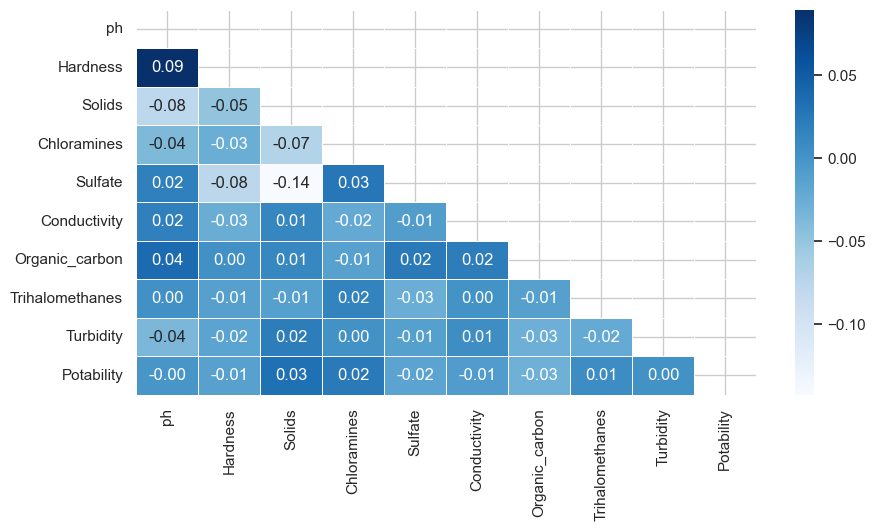

In [805]:
corr = df.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [806]:
### hardness and ph

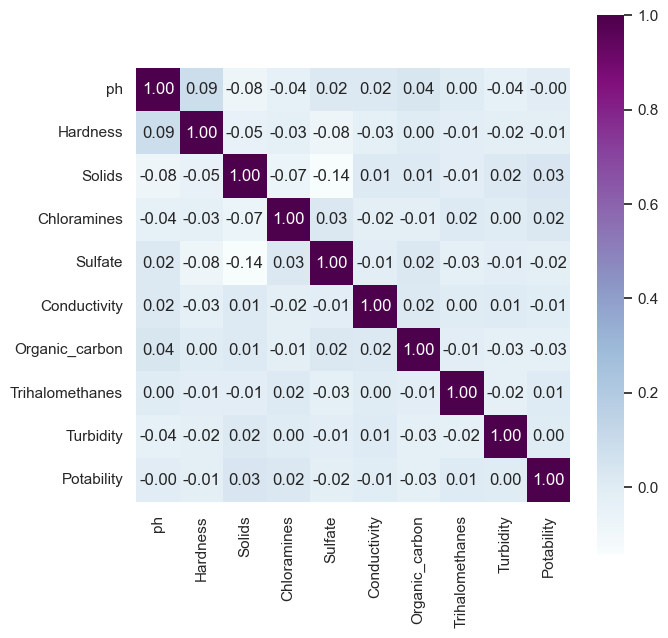

In [807]:
Corrmat = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(Corrmat, cmap="BuPu", square = True, annot=True, fmt='.2f')
plt.show()

### show distrubution

In [808]:
from collections import Counter

In [809]:
fig = px.histogram(df,x='ph',y=(df['ph']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color="blue",line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color='green',size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='blue',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [810]:
df

ph    Hardness  ...  Turbidity  Potability
0     7.036752  204.890455  ...   2.963135         0.0
1     3.889107  129.422921  ...   4.500656         0.0
2     8.099124  224.236259  ...   3.055934         0.0
3     8.316766  214.373394  ...   4.628771         0.0
4     9.092223  181.101509  ...   4.075075         0.0
...        ...         ...  ...        ...         ...
3271  4.668102  193.681735  ...   4.435821         1.0
3272  7.808856  193.553212  ...   2.798243         1.0
3273  9.419510  175.762646  ...   3.298875         1.0
3274  5.126763  230.603758  ...   4.708658         1.0
3275  7.874671  195.102299  ...   2.309149         1.0

[3276 rows x 10 columns]

In [811]:
fig = px.histogram(df,x='Hardness',y=(df['Hardness']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_vline(x=7, line_width=1, line_color="blue",line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Level Distribution',x=0.5,y=0.95,
               font=dict(color='green',size=20)),
    xaxis_title_text='Hardness Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='blue',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [812]:
fig = px.histogram(df,x='Solids',y=(df['Solids']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_vline(x=7, line_width=1, line_color="blue",line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='Solids Level Distribution',x=0.5,y=0.95,
               font=dict(color='green',size=20)),
    xaxis_title_text='Solids Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='blue',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [813]:
fig = px.histogram(df,x='Chloramines',y=(df['Chloramines']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_vline(x=7, line_width=1, line_color="blue",line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Level Distribution',x=0.5,y=0.95,
               font=dict(color='green',size=20)),
    xaxis_title_text='Chloramines Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='blue',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [814]:
fig = px.histogram(df,x='Sulfate',y=(df['Sulfate']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_vline(x=250, line_width=1, line_color='#154989',line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color='#154989',size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='#154989',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [815]:
fig = px.histogram(df,x='Conductivity',y=(df['Conductivity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color='#248DC5',size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='#248DC5',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [816]:
fig = px.histogram(df,x='Organic_carbon',y=(df['Organic_carbon']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_vline(x=10, line_width=1, line_color="#154989",line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color='#154989',size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='#154989',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [817]:
fig = px.histogram(df,x='Trihalomethanes',y=(df['Trihalomethanes']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count',width=700,height=400)

fig.add_vline(x=10, line_width=1, line_color="#154989",line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color='#154989',size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='#154989',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()
fig.show()

In [818]:
fig = px.histogram(df,x='Turbidity',y=(df['Turbidity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#248DC5', "#154989"],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color='#248DC5',line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color='#248DC5',size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='#248DC5',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

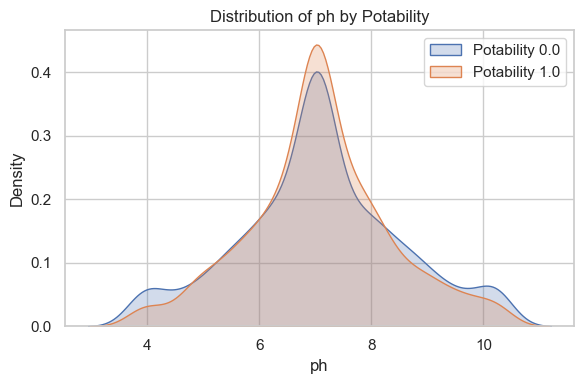

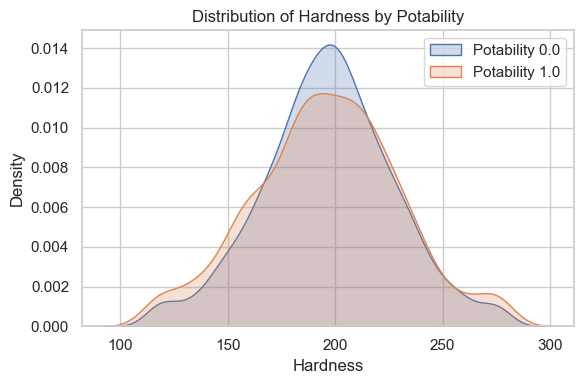

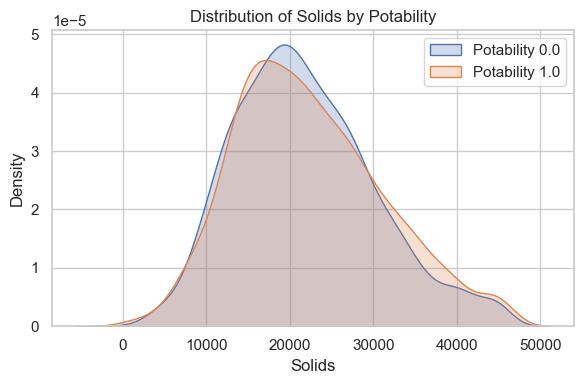

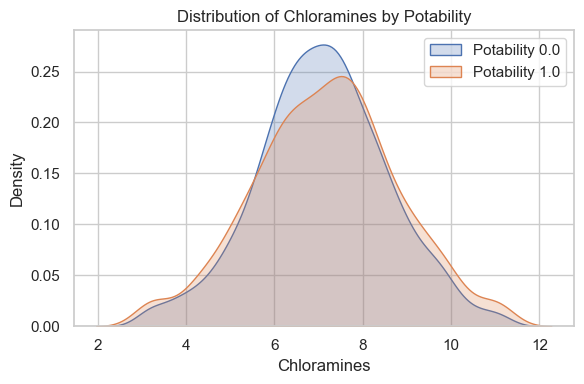

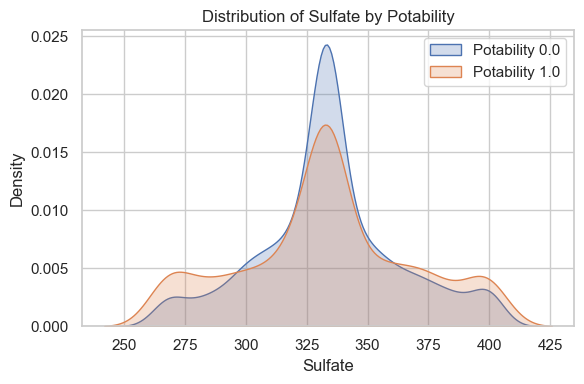

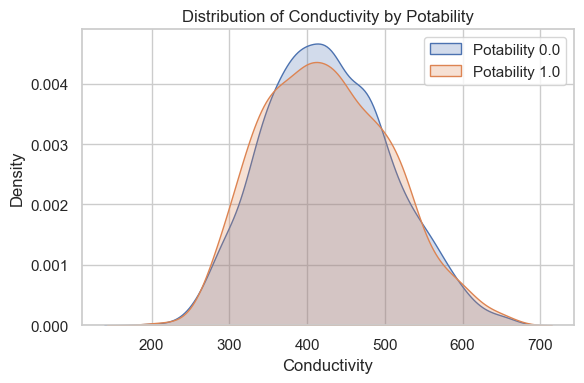

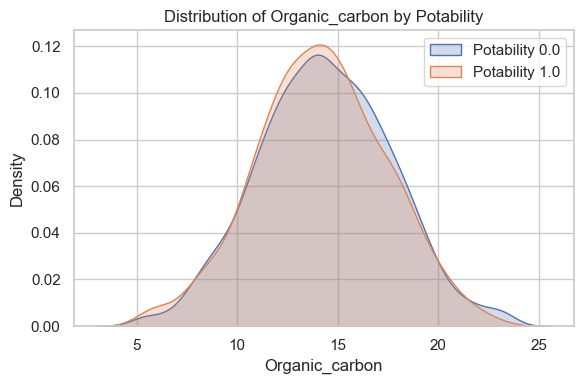

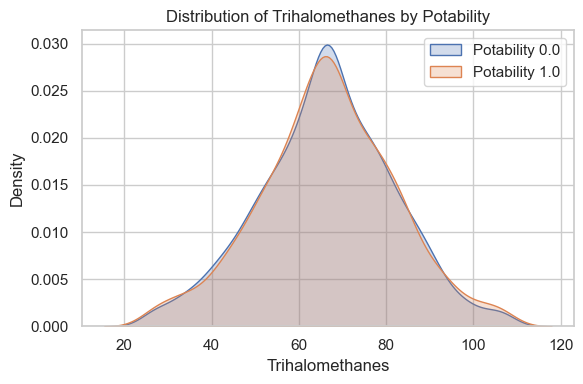

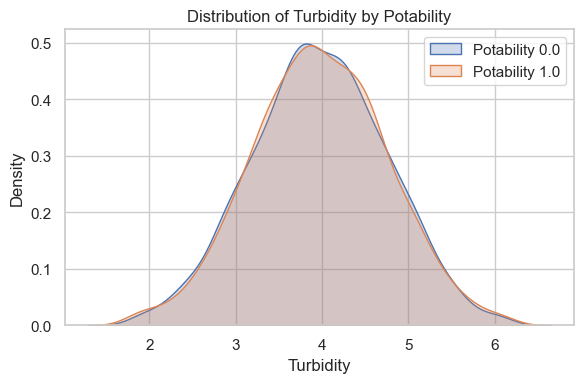

In [819]:
for feature in features:
    plt.figure(figsize=(6, 4))
    for label in df['Potability'].unique():
        subset = df[df['Potability'] == label]
        sns.kdeplot(subset[feature], label=f'Potability {label}', fill=True)
    plt.title(f'Distribution of {feature} by Potability')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [820]:
from scipy.stats import  skew

skewness_values = df.apply(lambda x: skew(x))

threshold = 0.5  
skewed_columns_count = skewness_values[abs(skewness_values) > threshold]
print("Skewed columns:\n", skewed_columns_count)


Skewed columns:
 Series([], dtype: float64)

In [821]:
print(df.groupby(["Potability"])["ph"].mean())

Potability
0.0    7.075208
1.0    7.070440
Name: ph, dtype: float64

In [822]:
print(df.groupby(["Potability"])["Solids"].mean())

Potability
0.0    21738.283429
1.0    22299.224786
Name: Solids, dtype: float64

In [823]:
print(df.groupby(["Potability"])["Chloramines"].mean())

Potability
0.0    7.092748
1.0    7.167203
Name: Chloramines, dtype: float64

#### feature engineering

In [824]:
## 1 - Is the water pH neutral?
df['is_ph_neutral']=df['ph'].between(6.5,8.5)
# 2 - Is the water hard?
df['is_hard']=df["Hardness"]>300
# 5 - Ratio of Organic Carbon to Solids
df['carbon_ratio'] = df['Organic_carbon'] / (df['Solids'] + 1)  # Avoid division by zero

# 6 - Ratio of Sulfate to Solids
df['sulfate_to_solids'] = df['Sulfate'] / (df['Solids'] + 1)
df['ph_x_chloramines'] = df['ph'] * df['Chloramines']
df['hardness_minus_ph'] = df['Hardness'] - df['ph']



In [825]:
df

ph    Hardness  ...  ph_x_chloramines  hardness_minus_ph
0     7.036752  204.890455  ...         51.369781         197.853703
1     3.889107  129.422921  ...         25.805181         125.533814
2     8.099124  224.236259  ...         75.126533         216.137135
3     8.316766  214.373394  ...         67.027581         206.056628
4     9.092223  181.101509  ...         59.523150         172.009286
...        ...         ...  ...               ...                ...
3271  4.668102  193.681735  ...         33.454599         189.013634
3272  7.808856  193.553212  ...         62.950015         185.744356
3273  9.419510  175.762646  ...         69.235598         166.343136
3274  5.126763  230.603758  ...         32.315815         225.476995
3275  7.874671  195.102299  ...         59.133316         187.227627

[3276 rows x 16 columns]

In [826]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [827]:
# from imblearn.over_sampling import RandomOverSampler
# ros=RandomOverSampler(random_state=42)
# X,y=ros.fit_resample(x,y)

In [828]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()
x=SD.fit_transform(x)


In [829]:
x

array([[-0.02648354,  0.26546146, -0.13569133, ..., -0.0556891 ,
         0.07356635,  0.26738846],
       [-2.30437279, -2.09199269, -0.38724913, ..., -0.04920479,
        -1.67468312, -1.99838145],
       [ 0.74233437,  0.8697855 , -0.2383249 , ..., -0.09768826,
         1.69818509,  0.84020528],
       ...,
       [ 1.69787199, -0.64443277,  1.30343415, ..., -0.37972949,
         1.29533018, -0.71983228],
       [-1.40870536,  1.06869335, -1.16082554, ...,  0.36918518,
        -1.2294498 ,  1.1328215 ],
       [ 0.57990224, -0.04030089, -0.52993429, ...,  0.003934  ,
         0.60447999, -0.06552471]], shape=(3276, 15))

## classification

In [830]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [831]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [832]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(C=50,penalty='l2')
logistic.fit(X_train,y_train)
lo_pred=logistic.predict(X_test)

In [833]:
print(f"acuuuracy for train model is {logistic.score(X_train,y_train)}")
print(f"acuuuracy for test model is {logistic.score(X_test,y_test)}")

acuuuracy for train model is 0.6229007633587786

acuuuracy for test model is 0.6539634146341463

In [834]:
accuracyModel1=accuracy_score(y_test,lo_pred)
print(f"accuracy of the model is {accuracyModel1}")

accuracy of the model is 0.6539634146341463

Accuracy Score: 0.65

classification report:              precision    recall  f1-score   support

         0.0       0.65      0.95      0.78       412
         1.0       0.65      0.15      0.25       244

    accuracy                           0.65       656
   macro avg       0.65      0.55      0.51       656
weighted avg       0.65      0.65      0.58       656

__________________________________________________

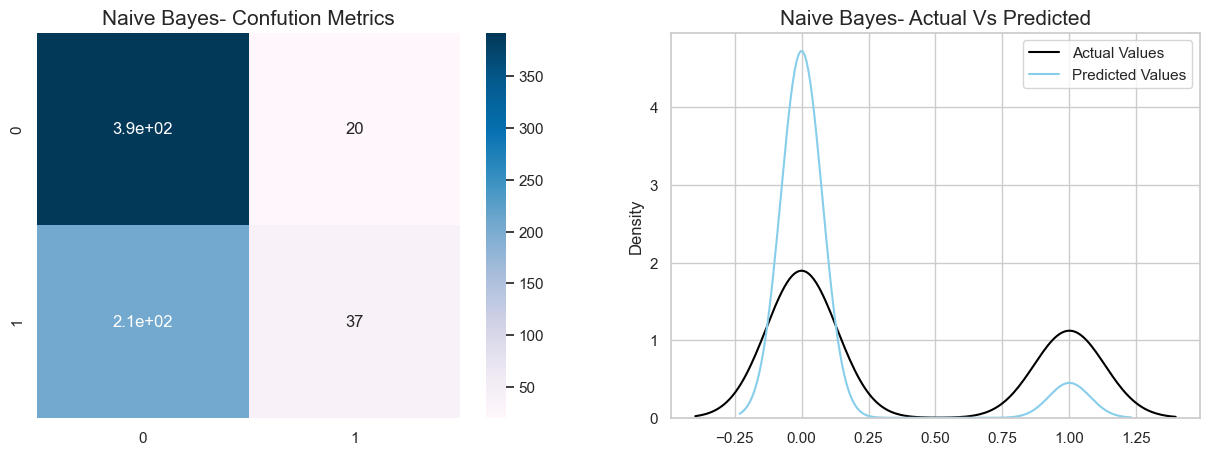

In [835]:
cals_report=classification_report(y_test,lo_pred)

print(f'Accuracy Score: {accuracyModel1:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, lo_pred)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'Naive Bayes- Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(lo_pred, color='skyblue',label='Predicted Values')
plt.title(f'Naive Bayes- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [836]:
from sklearn.naive_bayes import GaussianNB

In [837]:
model1=GaussianNB()
model1.fit(X_train ,y_train)
y_pred1=model1.predict(X_test)


In [838]:
acc=accuracy_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1,average='weighted')
print("Accuracy:", acc)
print("F1 Score:", f1)

Accuracy: 0.6371951219512195

F1 Score: 0.5652601955805149

Accuracy Score: 0.64

classification report:              precision    recall  f1-score   support

         0.0       0.65      0.93      0.76       412
         1.0       0.55      0.15      0.23       244

    accuracy                           0.64       656
   macro avg       0.60      0.54      0.50       656
weighted avg       0.61      0.64      0.57       656

__________________________________________________

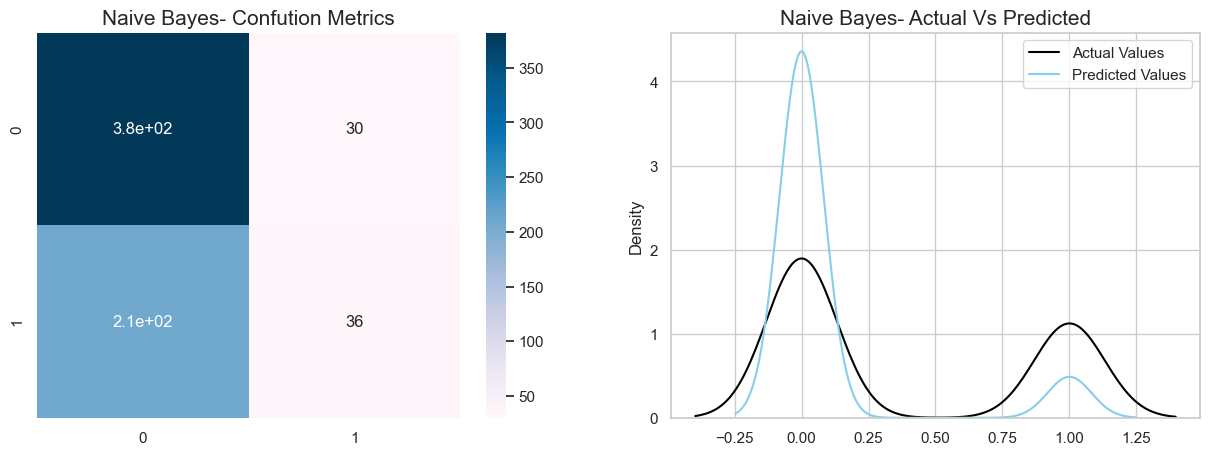

In [839]:
cals_report=classification_report(y_test,y_pred1)

print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'Naive Bayes- Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred1, color='skyblue',label='Predicted Values')
plt.title(f'Naive Bayes- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [948]:
from sklearn.svm import SVC
model4=SVC(kernel='rbf',C=1.2,max_iter=1000)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
acc=accuracy_score(y_test,y_pred4)
print(acc)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



0.7012195121951219

Accuracy Score: 0.70

classification report:              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       412
         1.0       0.69      0.36      0.47       244

    accuracy                           0.70       656
   macro avg       0.70      0.63      0.63       656
weighted avg       0.70      0.70      0.67       656

__________________________________________________

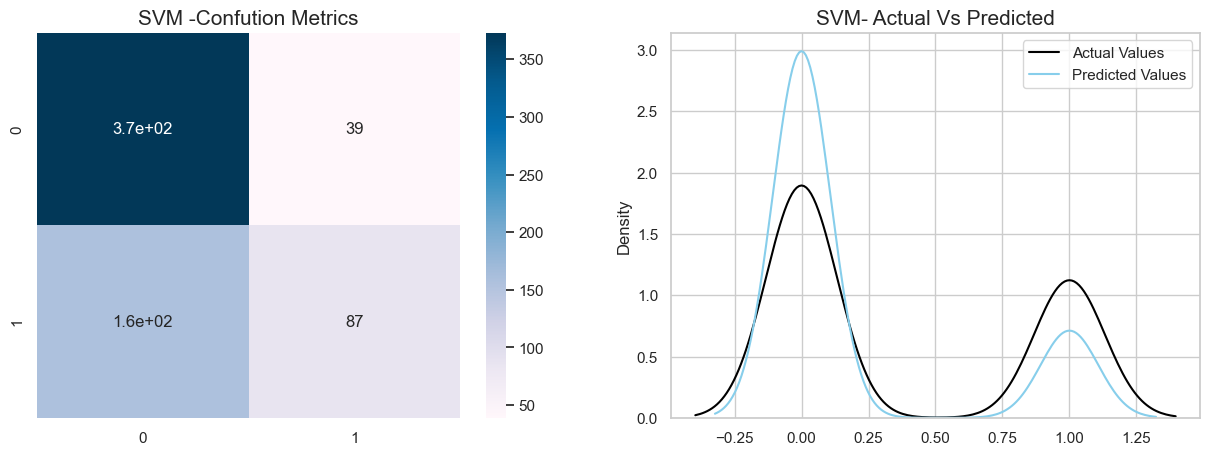

In [949]:
cals_report=classification_report(y_test,y_pred4)
acc=accuracy_score(y_test,y_pred4)
print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'SVM -Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred4, color='skyblue',label='Predicted Values')
plt.title(f'SVM- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [842]:
model4.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## svm with kernal 

In [958]:
from sklearn.svm import SVC
model1=SVC(C=0.01,kernel='linear',max_iter=3000,gamma="auto")
model1.fit(X_train,y_train)
y_pred5=model1.predict(X_test)
acc=accuracy_score(y_test,y_pred5)
print(f'Accuracy Score: {acc:.2f}')


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Accuracy Score: 0.63

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy Score: 0.63

classification report:              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

__________________________________________________

C:\Users\DELL\AppData\Local\Temp\ipykernel_20996\492362454.py:16: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



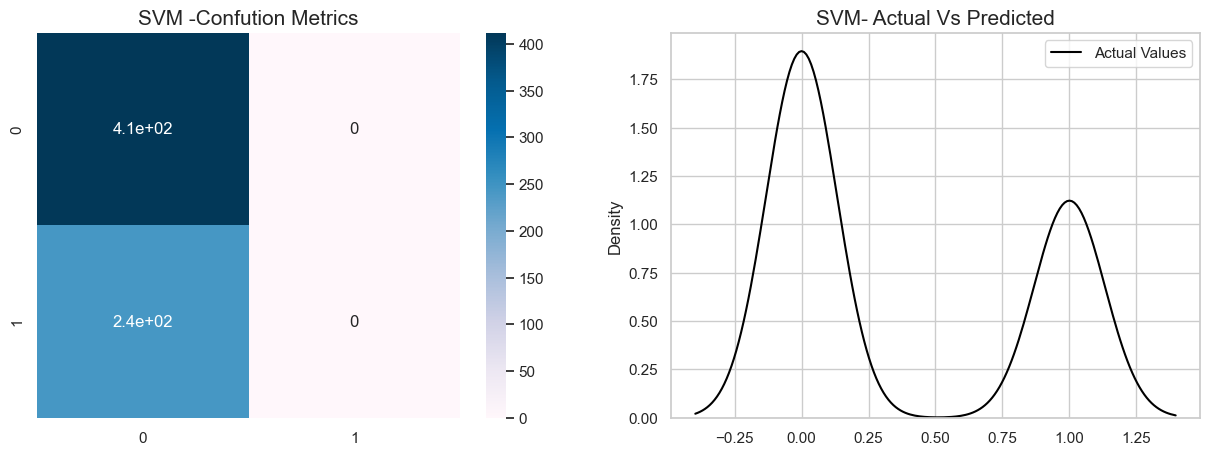

In [898]:
cals_report=classification_report(y_test,y_pred5)
acc=accuracy_score(y_test,y_pred5)
print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'SVM -Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred5, color='skyblue',label='Predicted Values')
plt.title(f'SVM- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

### SVM  poly 

In [961]:
from sklearn.svm import SVC
model1=SVC(C=0.1,kernel='poly',max_iter=5000,degree=2,gamma='auto')
model1.fit(X_train,y_train)
y_pred6=model1.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
print("Accurancy:",accuracy_score(y_test,y_pred6))

Accurancy: 0.6676829268292683

Accuracy Score: 0.67

classification report:              precision    recall  f1-score   support

         0.0       0.66      0.97      0.79       412
         1.0       0.76      0.16      0.26       244

    accuracy                           0.67       656
   macro avg       0.71      0.56      0.52       656
weighted avg       0.70      0.67      0.59       656

__________________________________________________

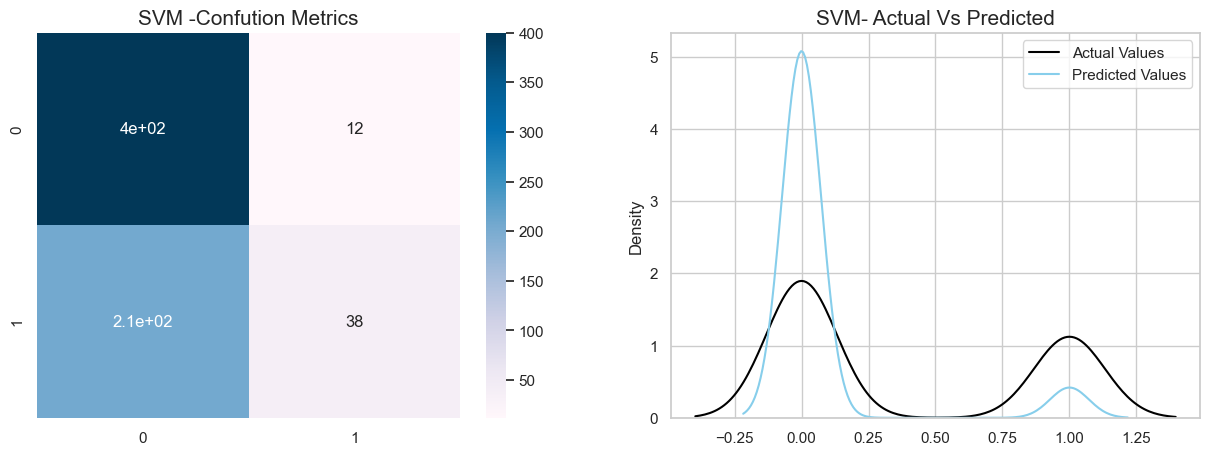

In [897]:
cals_report=classification_report(y_test,y_pred6)
acc=accuracy_score(y_test,y_pred6)
print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred6)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'SVM -Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred6, color='skyblue',label='Predicted Values')
plt.title(f'SVM- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [1033]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=3,weights='distance')
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print("Accurancy:",accuracy_score(y_test,y_pred))

Accurancy: 0.6737804878048781

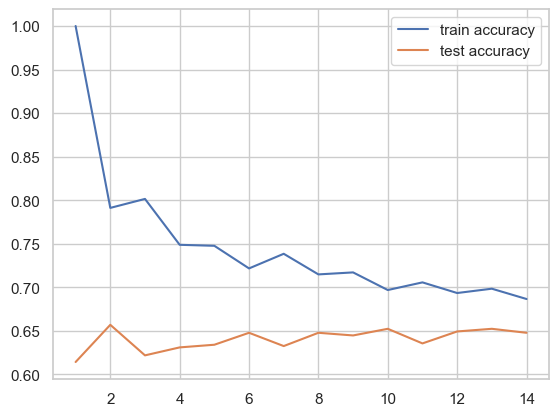

In [848]:
train_acc = []
test_acc = []
for i in range(1, 15):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    train_acc.append(KNN.score(X_train, y_train))
    test_acc.append(KNN.score(X_test, y_test))
num_neighbors = [i for i in range(1, 15)]
plt.plot(num_neighbors,train_acc,label='train accuracy')
plt.plot(num_neighbors,test_acc,label='test accuracy')
plt.legend()
plt.show()

### مكتبة بتعمل كل حاجة في الماشين 

### decison Tree

In [1027]:
from sklearn.tree import DecisionTreeClassifier
model7=DecisionTreeClassifier(max_depth=30,max_features=10,max_leaf_nodes=5,random_state=42,criterion='entropy')
model7.fit(X_train,y_train)
y_pred7=model7.predict(X_test)
acc=accuracy_score(y_test,y_pred7)
print(f'Accuracy Score: {acc:.2f}')


Accuracy Score: 0.64

In [1026]:
model7.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 2,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Accuracy Score: 0.64

classification report:              precision    recall  f1-score   support

         0.0       0.64      0.94      0.77       412
         1.0       0.56      0.12      0.20       244

    accuracy                           0.64       656
   macro avg       0.60      0.53      0.48       656
weighted avg       0.61      0.64      0.55       656

__________________________________________________

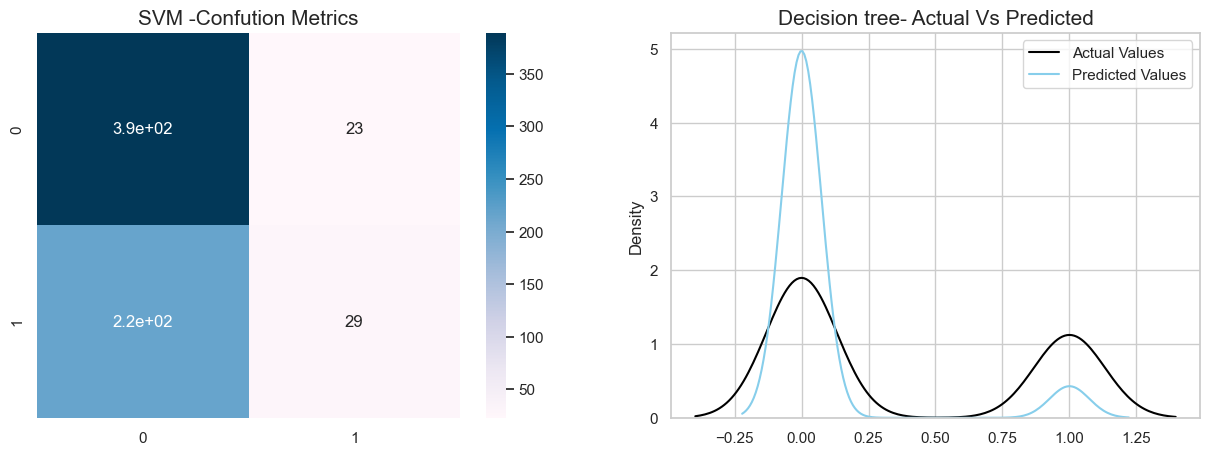

In [990]:
cals_report=classification_report(y_test,y_pred7)
acc=accuracy_score(y_test,y_pred7)
print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred7)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'SVM -Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred7, color='skyblue',label='Predicted Values')
plt.title(f'Decision tree- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [1080]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,max_depth=20,max_features=20)

In [1081]:
model2.fit(X_train,y_train)
y_pred8=model2.predict(X_test)
acc=accuracy_score(y_test,y_pred8)
print(f'Accuracy Score: {acc:.2f}')

Accuracy Score: 0.69

Accuracy Score: 0.69

classification report:              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78       412
         1.0       0.64      0.39      0.49       244

    accuracy                           0.69       656
   macro avg       0.67      0.63      0.63       656
weighted avg       0.68      0.69      0.67       656

__________________________________________________

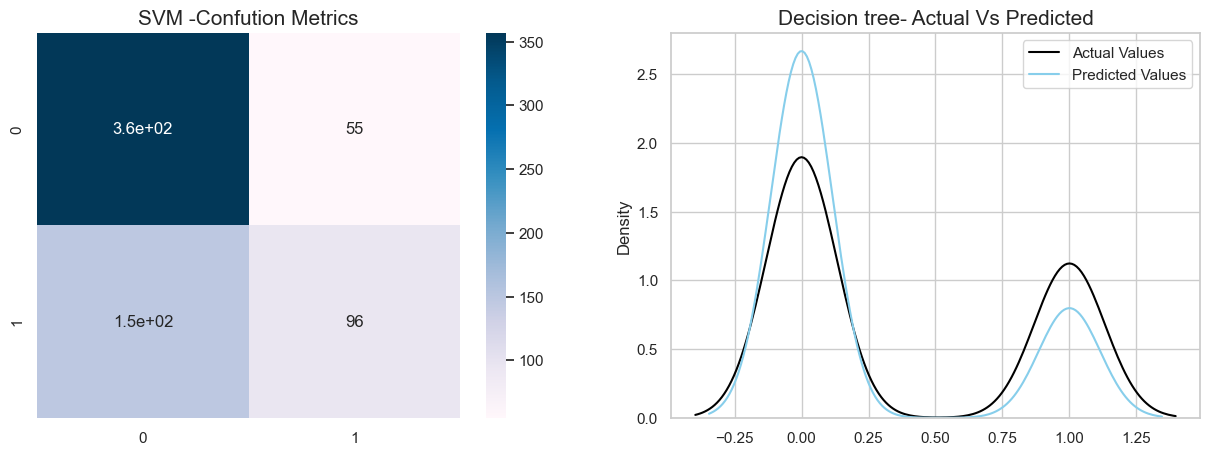

In [ ]:
cals_report=classification_report(y_test,y_pred8)
acc=accuracy_score(y_test,y_pred8)
print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred8)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'RandomForestClassifier -Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred8, color='skyblue',label='Predicted Values')
plt.title(f'Decision tree- Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [1065]:
from xgboost import XGBClassifier
XG=XGBClassifier(max_depth=50,learning_rate=0.2,random_state=42,n_estimators=10)
XG.fit(X_train,y_train)
y_pred9=XG.predict(X_test)
acc=accuracy_score(y_test,y_pred9)
print(f'Accuracy Score: {acc:.2f}')


Accuracy Score: 0.70

In [1038]:
XG.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Accuracy Score: 0.70

classification report:              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       412
         1.0       0.63      0.47      0.54       244

    accuracy                           0.70       656
   macro avg       0.68      0.65      0.66       656
weighted avg       0.69      0.70      0.69       656

__________________________________________________

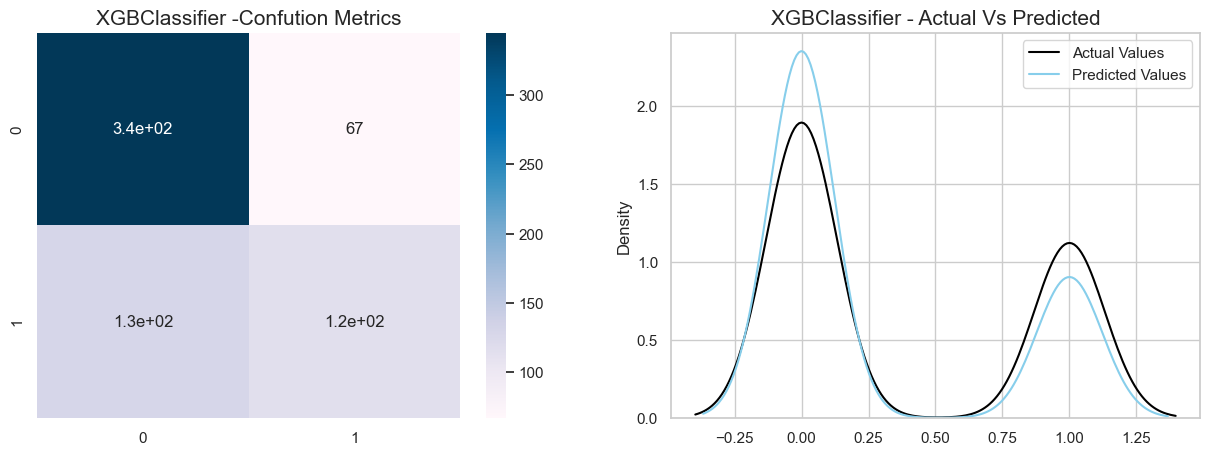

In [1066]:
cals_report=classification_report(y_test,y_pred9)
acc=accuracy_score(y_test,y_pred9)
print(f'Accuracy Score: {acc:.2f}')
print(f'classification report:{cals_report} ')
print('_' * 50)
print()

cm = confusion_matrix(y_test, y_pred9)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.title(f'XGBClassifier -Confution Metrics', fontsize=15)

plt.subplot(1, 2, 2)
sns.kdeplot(y_test.values, color='black', label='Actual Values')
sns.kdeplot(y_pred9, color='skyblue',label='Predicted Values')
plt.title(f'XGBClassifier - Actual Vs Predicted', fontsize=15)
plt.legend()
plt.show()

In [1100]:
from catboost import CatBoostClassifier
model_cat=CatBoostClassifier(iterations=300,learning_rate=0.03,depth=8,eval_metric="Accuracy",verbose=50,random_state=0)
model_cat.fit(X_train, y_train)

0:	learn: 0.6729008	total: 23.4ms	remaining: 6.99s
50:	learn: 0.7492366	total: 926ms	remaining: 4.52s
100:	learn: 0.7946565	total: 1.51s	remaining: 2.97s
150:	learn: 0.8358779	total: 2.07s	remaining: 2.05s
200:	learn: 0.8713740	total: 2.64s	remaining: 1.3s
250:	learn: 0.9045802	total: 3.19s	remaining: 623ms
299:	learn: 0.9229008	total: 3.73s	remaining: 0us


In [1101]:
y_pred = model_cat.predict(X_test)

# النتائج
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6920731707317073

[[362  50]
 [152  92]]

precision    recall  f1-score   support

         0.0       0.70      0.88      0.78       412
         1.0       0.65      0.38      0.48       244

    accuracy                           0.69       656
   macro avg       0.68      0.63      0.63       656
weighted avg       0.68      0.69      0.67       656